# BIG WILD CATS RECOGNITION

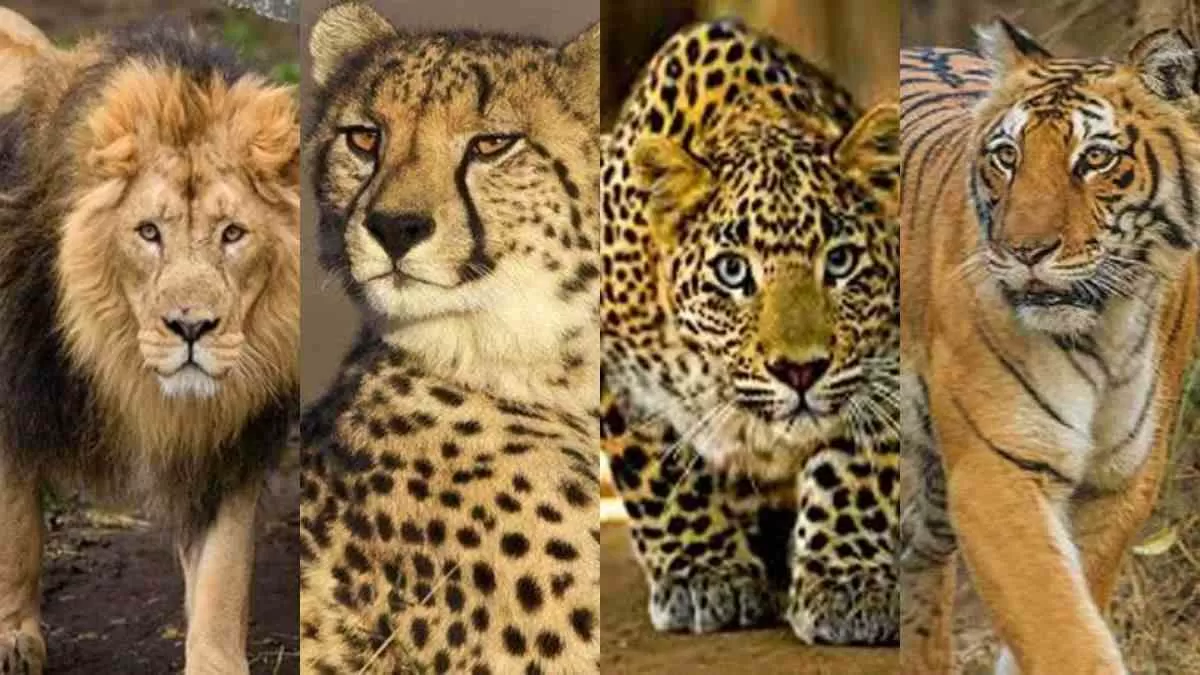

# Import Libraries

In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras import models
from keras import layers
from tensorflow.keras import optimizers
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd

# Set Directories path

In [2]:
base_dir= 'animals/'
train_dir= os.path.join(base_dir, 'train')
train_cheetah_dir= os.path.join(train_dir, 'cheetah')
train_leopard_dir= os.path.join(train_dir, 'leopard')
train_lion_dir= os.path.join(train_dir, 'lion')
train_tiger_dir= os.path.join(train_dir, 'tiger')


validation_dir= os.path.join(base_dir, 'train')
validation_cheetah_dir= os.path.join(validation_dir, 'cheetah')
validation_leopard_dir= os.path.join(validation_dir, 'leopard')
validation_lion_dir= os.path.join(validation_dir, 'lion')
validation_tiger_dir= os.path.join(validation_dir, 'tiger')

test_dir= os.path.join(base_dir, 'train')
test_cheetah_dir= os.path.join(test_dir, 'cheetah')
test_leopard_dir= os.path.join(test_dir, 'leopard')
test_lion_dir= os.path.join(test_dir, 'lion')
test_tiger_dir= os.path.join(test_dir, 'tiger')

In [3]:
print(f'Train Cheetah : {len(os.listdir(train_cheetah_dir))}')
print(f'Train Leopard : {len(os.listdir(train_leopard_dir))}')
print(f'Train Lion : {len(os.listdir(train_lion_dir))}')
print(f'Train Tiger : {len(os.listdir(train_tiger_dir))}')

print(f'Validation Cheetah : {len(os.listdir(validation_cheetah_dir))}')
print(f'Validation Leopard : {len(os.listdir(validation_leopard_dir))}')
print(f'Validation Lion : {len(os.listdir(validation_lion_dir))}')
print(f'Validation Tiger : {len(os.listdir(validation_tiger_dir))}')

print(f'Test Cheetah : {len(os.listdir(test_cheetah_dir))}')
print(f'Test Leopard : {len(os.listdir(test_leopard_dir))}')
print(f'Test Lion : {len(os.listdir(test_lion_dir))}')
print(f'Test Tiger : {len(os.listdir(test_tiger_dir))}')

Train Cheetah : 186
Train Leopard : 180
Train Lion : 182
Train Tiger : 190
Validation Cheetah : 186
Validation Leopard : 180
Validation Lion : 182
Validation Tiger : 190
Test Cheetah : 186
Test Leopard : 180
Test Lion : 182
Test Tiger : 190


# Data Preprocessing Phase

In [5]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
X_train = train_data_gen.flow_from_directory(
                            train_dir,
                            target_size = (150,150),
                            batch_size = 20,
                            class_mode = 'categorical')

X_validation = validation_data_gen.flow_from_directory(
                            validation_dir,
                            target_size = (150,150),
                            batch_size = 20,
                            class_mode = 'categorical')

Found 731 images belonging to 4 classes.
Found 731 images belonging to 4 classes.


In [7]:
for data_batch, labels_batch in X_train:
    print(f'The Data batch size : {data_batch.shape}')
    print(f'The Labels batch size : {labels_batch.shape}')
    break

The Data batch size : (20, 150, 150, 3)
The Labels batch size : (20, 4)


# Modeling Phase

In [8]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

# Compilation Phase

In [9]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training Phase

In [10]:

# Train the model
modelhistory=model.fit(X_train, epochs=10, validation_data=X_validation)

Epoch 1/10
37/37 [==============================] - 719s 20s/step - loss: 1.5081 - accuracy: 0.2791 - val_loss: 1.3404 - val_accuracy: 0.3201
Epoch 2/10
37/37 [==============================] - 202s 6s/step - loss: 1.3149 - accuracy: 0.4104 - val_loss: 1.0660 - val_accuracy: 0.6238
Epoch 3/10
37/37 [==============================] - 206s 6s/step - loss: 1.0780 - accuracy: 0.5267 - val_loss: 0.8686 - val_accuracy: 0.6621
Epoch 4/10
37/37 [==============================] - 201s 5s/step - loss: 0.8492 - accuracy: 0.6553 - val_loss: 0.8295 - val_accuracy: 0.6539
Epoch 5/10
37/37 [==============================] - 189s 5s/step - loss: 0.7474 - accuracy: 0.7209 - val_loss: 0.4943 - val_accuracy: 0.7866
Epoch 6/10
37/37 [==============================] - 185s 5s/step - loss: 0.5448 - accuracy: 0.8098 - val_loss: 0.6371 - val_accuracy: 0.7538
Epoch 7/10
37/37 [==============================] - 195s 5s/step - loss: 0.3283 - accuracy: 0.8906 - val_loss: 0.3948 - val_accuracy: 0.8577
Epoch 8/10
3

# Model Evaluation

In [11]:
loss=modelhistory.history['loss']
val_loss= modelhistory.history['val_loss']
accuracy= modelhistory.history['accuracy']
val_accuracy= modelhistory.history['val_accuracy']

In [12]:
df = pd.DataFrame({'loss':loss,'val_loss':val_loss,'accuracy':accuracy,'val_accuracy':val_accuracy})
df.to_csv('CNNResults.csv')

# Save the Model

In [13]:
model.save('big_cat.h5')